402.1157324569167 0.00034871023664879823
2306304 2306304


C:\Users\LENOVO\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


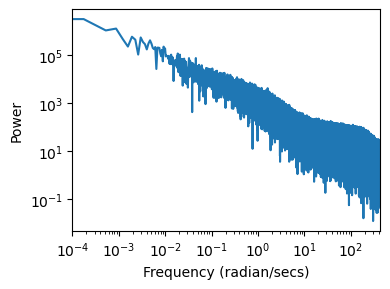

402.11573249388766

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

#data
mag=np.load('magneticz.npy')
time=np.load('Time.24.02.2019.mms1.npy')


l = time.size
h = (time[l-1]-time[0])/(l-1)
del_w = (2*np.pi)/(time[l-1])       
w_m = (np.pi)/h
print(w_m,del_w)

w = np.arange(-w_m,w_m,del_w)       #freq array

#fourier transform
fourier = np.fft.fft(mag)
fourier_sorted = np.fft.fftshift(fourier)
f_mag2= fourier_sorted*(np.conjugate(fourier_sorted))
f_mag = np.sqrt(f_mag2)
f_log=np.log(f_mag)
p=abs(fourier_sorted)**2

fig, axs = plt.subplots(1, 1,
                        figsize =(4, 3),
                        tight_layout = True)

plt.plot(w,f_mag)
plt.xscale("log")
plt.yscale("log")

plt.xlabel('Frequency (radian/secs)')
plt.ylabel('Power')
plt.xlim(1e-4,4.3*1e2)

fig.savefig('logfft1x.eps', format='eps', dpi=300)
plt.show()

In [2]:
# range where noise exists

def closest(w, K):
      
    return (min(range(len(w)), key = lambda i: abs(w[i]-K)))
      
K1 = -30.0
K2 = 30.0
K3 = 0.0
start= closest(w, K1)
end = closest(w, K2)
zero = closest(w,K3)
print(start,end,zero)

1067120 1239183 1153151


In [3]:
#eliminating noise
narr=fourier_sorted
narr[:start]=0
narr[end+1:]=0
is_narr=np.fft.ifftshift(narr)   

2306304

In [4]:
inv_f = np.fft.ifft(is_narr)    #inv fourier transorm
inverse_fourier=inv_f.real

In [6]:
np.save('nfmms1bz.30',inverse_fourier)       #noise reduced data